# TP 4 - Fisher

## Ejercicio 2

* _Implementar el discriminante lineal de Fisher para 3 o más clases gaussianas isotrópicas_

## Comentarios

Voy a utilizar 3 clases gaussianas isotrópicas, en un espacio de 3 dimensiones.

In [6]:
clc;

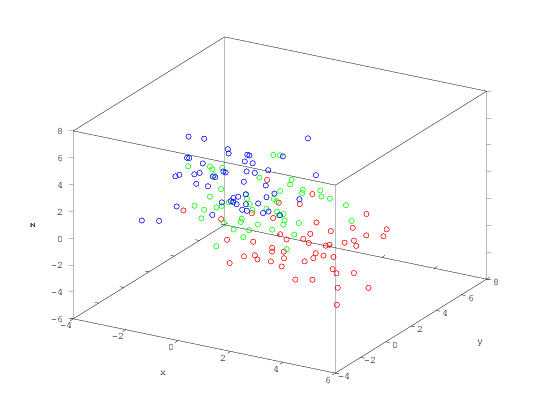

In [34]:
%% MUESTREO
NSAMPLES = 50;
SEP = 3;

model_mu_1 = [SEP 0 0];
model_sigma_1 = eye(3) * 2;
model_mu_2 = [0 SEP 0];
model_sigma_2 = model_sigma_1;
model_mu_3 = [0 0 SEP];
model_sigma_3 = model_sigma_1;

D_1 = D_2 = D_3 = [];
for i = 1:NSAMPLES
  D_1(i,:) = mvnrnd(model_mu_1, model_sigma_1);
  D_2(i,:) = mvnrnd(model_mu_2, model_sigma_2);
  D_3(i,:) = mvnrnd(model_mu_3, model_sigma_3);
end

hold on;
xlabel('x'); ylabel('y'); zlabel('z');
scatter3(D_1(:,1), D_1(:,2), D_1(:,3), 15, "r");
scatter3(D_2(:,1), D_2(:,2), D_2(:,3), 15, "g");
scatter3(D_3(:,1), D_3(:,2), D_3(:,3), 15, "b");
view(80, 125);

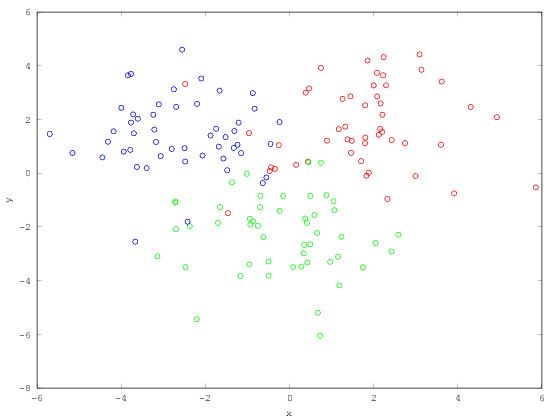

In [35]:
% FISHER
within = cov(D_1) + cov(D_2) + cov(D_3);
total_mean = mean([D_1; D_2; D_3]);
between = NSAMPLES * (mean(D_1) - total_mean)' * (mean(D_1) - total_mean) ...
          + NSAMPLES * (mean(D_2) - total_mean)' * (mean(D_2) - total_mean) ...
          + NSAMPLES * (mean(D_3) - total_mean)' * (mean(D_3) - total_mean);
[V, lambda] = eig(inv(within) * between);
eigenvalues = [lambda(1,1) lambda(2,2) lambda(3,3)];

% TRANSFORMATION
W = V;
[_, min_index] = min(eigenvalues);
W(:,min_index) = [];
p_1 = p_2 = p_3 = [];
for i = 1:NSAMPLES
  p_1(i,:) = W' * D_1(i,:)';
  p_2(i,:) = W' * D_2(i,:)';
  p_3(i,:) = W' * D_3(i,:)';
end

% PLOT
hold on;
xlabel('x'); ylabel('y');
scatter(p_1(:,1), p_1(:,2), 15, "r");
scatter(p_2(:,1), p_2(:,2), 15, "g");
scatter(p_3(:,1), p_3(:,2), 15, "b");

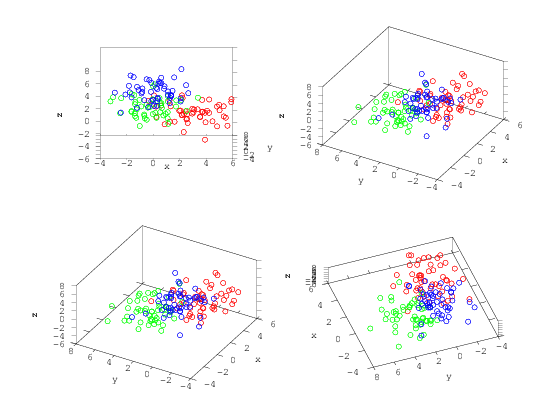

In [44]:
%% CHECK
function scatter_angle(index, angle_x, angle_y, D_1, D_2, D_3)
    subplot(2, 2, index);
    hold on;
    xlabel('x'); ylabel('y'); zlabel('z');
    scatter3(D_1(:,1), D_1(:,2), D_1(:,3), 15, "r");
    scatter3(D_2(:,1), D_2(:,2), D_2(:,3), 15, "g");
    scatter3(D_3(:,1), D_3(:,2), D_3(:,3), 15, "b");
    view(angle_x, angle_y);
endfunction

scatter_angle(1, 0, 15, D_1, D_2, D_3);
scatter_angle(2, 300, 50, D_1, D_2, D_3);
scatter_angle(3, 115, 115, D_1, D_2, D_3);
scatter_angle(4, 250, 80, );